<a href="https://colab.research.google.com/github/alfafimel/IPWK7-CORE/blob/master/IPWK7_CORE_SALES_PREDICTION_ELIZABETH_JOSEPHINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DEFINING THE QUESTION**

## **a) Specifying the question**



> You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

## **b) Defining the metrics for success**



> the creation of a model to accurately make predictions of the sale of the housing prices



## **c) Understanding the context**



> Knowing the factors that affect the housing sale prices is essential for any real estate company. provide your observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem

## **d) Recording the experimental design**

1.   Define the question, the metric for success, the context, experimental design taken.
2. Read and explore the given dataset.
3. Define the appropriateness of the available data to answer the given question.
4. Find and deal with outliers, anomalies, and missing data within the dataset.
5. Perform univariate, bivariate and multivariate analysis recording your observations.
6. Performing regression analysis.
> Incorporate categorical independent variables into your models.Check for multicollinearity
7. Provide a recommendation based on your analysis. 
> Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
8. Challenge your solution by providing insights on how you can make improvements in model improvement.

## **e) Relevance of the data**



> The data used for this project is necessary for the understanding of the real estate complexities and factors which later determine theoutcome of the project among others


> [http://bit.ly/IndependentProjectWeek7Dataset]. 


# **CHECKING DATA**

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
##

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# reading in the data
url = 'http://bit.ly/IndependentProjectWeek7Dataset'
df = pd.read_csv(url)
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
# previewing the number of columns
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
# checking the number of records in the data
df.shape

(21613, 20)

In [5]:
# previewing the top of the dataset
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# previewing the tail of the dataset
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [7]:
# checking whether every column has an appropriate datatype
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### **Data cleaning**

In [8]:
# checking for null values
df.isnull().any()

id               False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [9]:
# checking for duplicates
df.duplicated().any()

True

In [10]:
# drop all duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [11]:
# finding shape of the dataset
df.shape

(21610, 20)

In [12]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21610 non-null  int64  
 1   price          21610 non-null  float64
 2   bedrooms       21610 non-null  int64  
 3   bathrooms      21610 non-null  float64
 4   sqft_living    21610 non-null  int64  
 5   sqft_lot       21610 non-null  int64  
 6   floors         21610 non-null  float64
 7   waterfront     21610 non-null  int64  
 8   view           21610 non-null  int64  
 9   condition      21610 non-null  int64  
 10  grade          21610 non-null  int64  
 11  sqft_above     21610 non-null  int64  
 12  sqft_basement  21610 non-null  int64  
 13  yr_built       21610 non-null  int64  
 14  yr_renovated   21610 non-null  int64  
 15  zipcode        21610 non-null  int64  
 16  lat            21610 non-null  float64
 17  long           21610 non-null  float64
 18  sqft_l

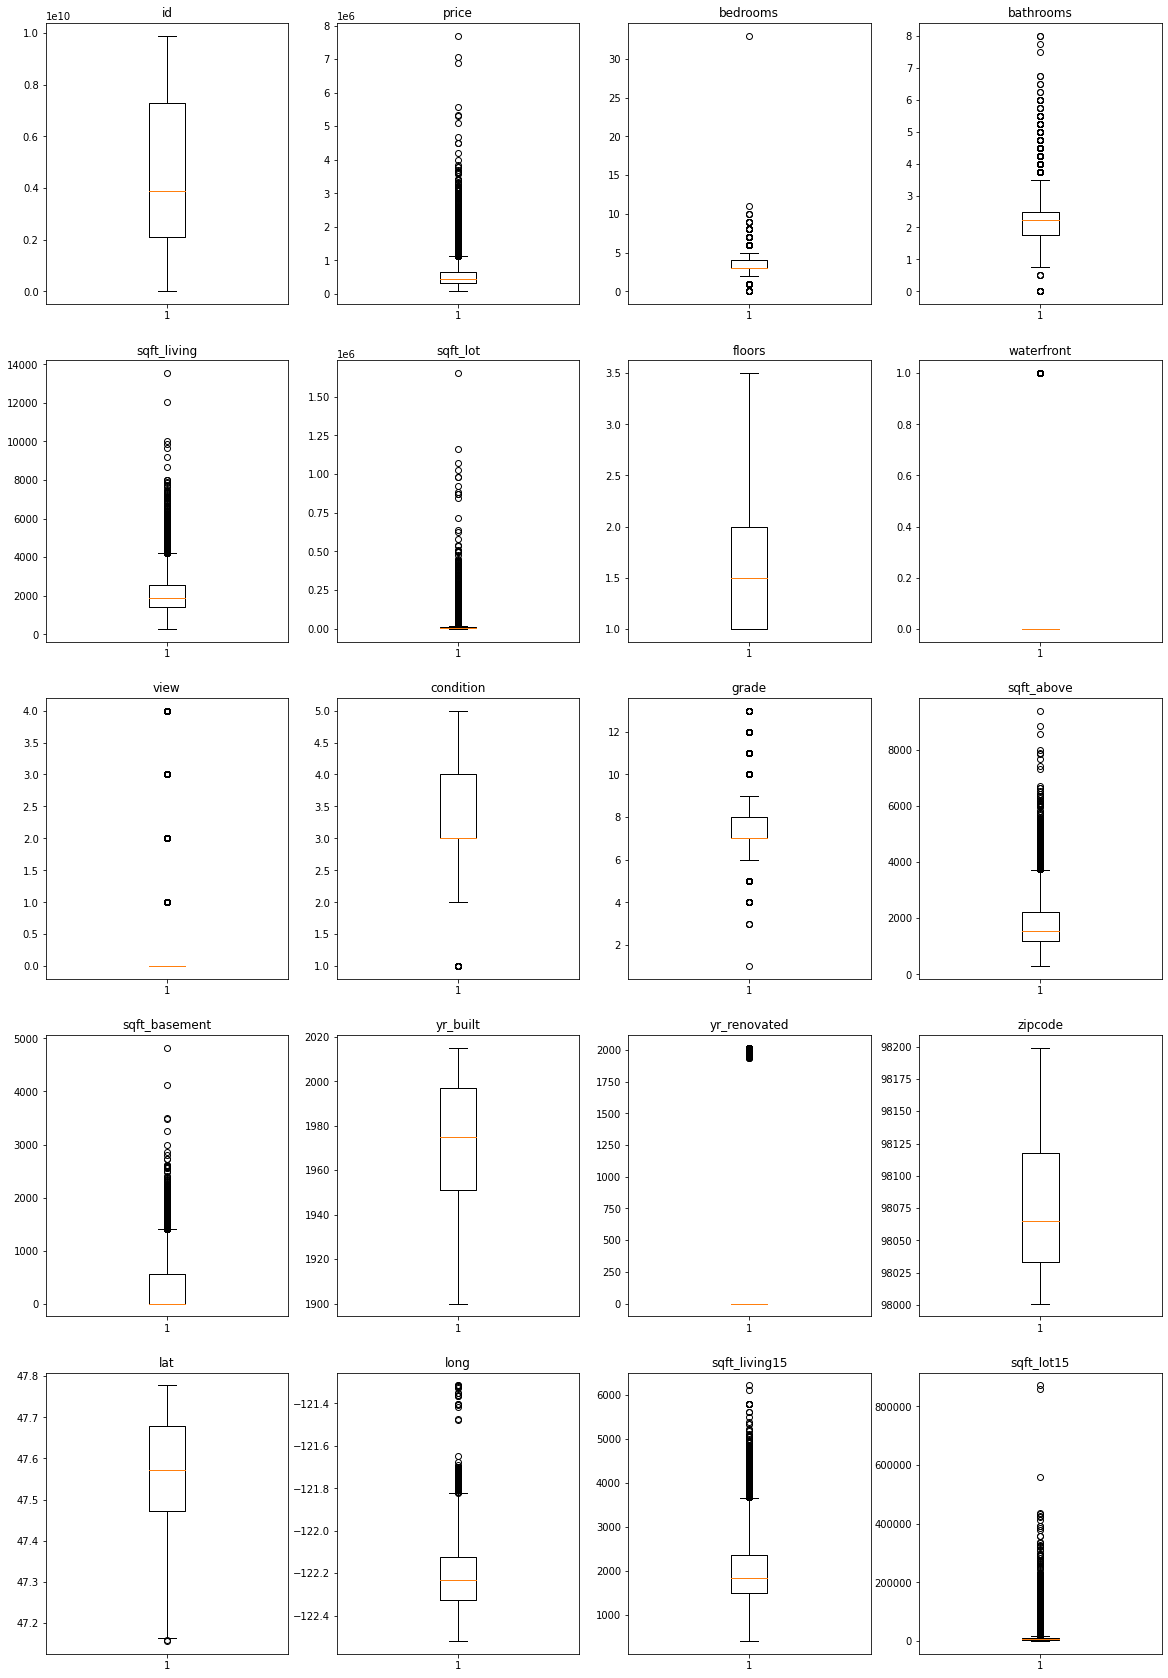

In [13]:
# Checking for Outliers
 
# save the column names onto a dictionary
columns_dict = {'id': 1, 'price': 2, 'bedrooms': 3, 'bathrooms': 4, 'sqft_living': 5, 'sqft_lot': 6,
       'floors': 7, 'waterfront': 8, 'view': 9, 'condition': 10, 'grade': 11, 'sqft_above': 12,
       'sqft_basement': 13, 'yr_built': 14, 'yr_renovated':15, 'zipcode': 16, 'lat': 17, 'long': 18,
       'sqft_living15': 19, 'sqft_lot15': 20}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(df[variable])
  plt.title(variable)

plt.show()

In [14]:
# dealing with outliers
# quantiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(df1.shape)

# Printing the shape of our old dataset
print(df.shape)

(14935, 20)
(21610, 20)


In [15]:
# replacing values in waterfront with a yes and no
df1 = df1.replace({'waterfront': {0 :'no', 1 :'yes'}})

In [16]:
# converting year to datetime
df1['yr_built'] = pd.to_datetime(df1['yr_built'])
df1['yr_renovated'] = pd.to_datetime(df1['yr_renovated'])

In [17]:
# converting zipcode to string datatype
df1['zipcode'] = df1['zipcode'].astype(str)

In [18]:
# converting variables from float to int 
df1['bathrooms'] = df1['bathrooms'].astype(int)
df1['floors'] = df1['floors'].astype(int)

In [19]:
# dropping unnecessary columns
df2 = df1.drop(['id','yr_built', 'grade', 'yr_renovated', 'waterfront', 'view', 'condition', 'sqft_living15', 'sqft_basement', 'sqft_lot15'], axis = 1)

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14935 entries, 0 to 21612
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        14935 non-null  float64
 1   bedrooms     14935 non-null  int64  
 2   bathrooms    14935 non-null  int64  
 3   sqft_living  14935 non-null  int64  
 4   sqft_lot     14935 non-null  int64  
 5   floors       14935 non-null  int64  
 6   sqft_above   14935 non-null  int64  
 7   zipcode      14935 non-null  object 
 8   lat          14935 non-null  float64
 9   long         14935 non-null  float64
dtypes: float64(3), int64(6), object(1)
memory usage: 1.3+ MB


# **EXPLORATORY DATA ANALYSIS**

### **Univariate Analysis**

In [ ]:
# plot histograms for all numeric columns
# save the column names onto a dictionary
columns_dict = {'long': 1, 'price': 2, 'bedrooms': 3, 'bathrooms': 4, 'sqft_living': 5, 'sqft_lot': 6,
       'floors': 7, 'view': 8, 'condition': 9, 'grade': 10, 'sqft_above': 11,
       'sqft_basement': 12, 'lat': 15}
plt.figure(figsize = (20,30))
for variable,i in columns_dict.items():
  
  plt.subplot(5,4,i)
  sns.distplot(df1[variable])
  plt.title(variable)

plt.show()

In [ ]:
# describing the data
df1.describe()

### **Bivariate Analysis**

In [ ]:
### Categoric Feature Analysis
# Boxplot gives a good idea about how the Price is distributed across the categories.
# Distribution charts show how well each category is populated.
c = 0
len_c = 3 # (len(df1.columns)-2)
fig, axes = plt.subplots(len_c, 2, figsize=(10, 13))     # fig height = 70 -> in figsize(width,height)
for i, ax in enumerate(fig.axes):
    if (c < len_c) & (i % 2 == 0):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df2.columns[c], alpha=0.7, data=df2, ax=ax)

    if (c < len_c) & (i % 2 != 0):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(data = df2, x=df2.columns[c], y='price', ax=ax)
        c = c + 1
fig.tight_layout()

In [ ]:
# Ploting the bivariate summaries and recording our observations
# scatterplot
sns.pairplot(df2)
plt.show()

In [ ]:
# tabulating the correlation coefficients
corr = df2.corr()
corr

### **Multivariate Analysis**

In [ ]:
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

#The p vlaue is 0 the observed matrix is not an identity matrix.

(835175.1034153523, 0.0)

# **REGRESSION ANALYSIS**

## **MULTIPLE LINEAR REGRESSION**

In [23]:
#separating independent and dependent variable
#X = df1.iloc[:,1:].values
#y = df1.iloc[:,0].values
X = df2.iloc[:,1:-1].values
y = df2.iloc[:,-1] .values

In [24]:
##splitting dataset into training and testing dataset
#Train using 80% of the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
# Fitting Multiple Linear Regression to the Training set
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# Creating a baseline regression model
first_model = (mean_squared_error(y_true=y,y_pred=regressor.predict(X)))
print(first_model)

0.008865361104590503


In [26]:
# regression coefficient
regressor.intercept_

-14.254743419283713

In [27]:
# regression coeefficient
regressor.coef_

array([-6.17966962e-03,  1.36852778e-02, -2.75194797e-05,  3.63481707e-06,
        1.24227888e-03,  7.58365849e-05, -1.11581888e-03,  2.86852409e-02])

In [28]:
for i in range(4):
    print(regressor.coef_[i])

-0.006179669623976713
0.013685277801681398
-2.7519479699950923e-05
3.6348170693641796e-06


In [29]:
# comparing the predicted and actual data
#We can compare y_pred and y_test to find its accuracy
y_pred = regressor.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame.describe()

,Actual,Predicted
count,2987.000000,2987.000000
mean,-122.230716,-122.231623
std,0.123149,0.081078
min,-122.461000,-122.427902
25%,-122.332000,-122.301459
50%,-122.268000,-122.221225
75%,-122.152000,-122.164464
max,-121.827000,-122.034668


In [30]:
# Predicting the Test set results
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.07176219458554839
Mean Squared Error: 0.008810835164347339
Root Mean Squared Error: 0.09386604905048118


In [31]:
# root mean squared error for X-train
rmse=np.sqrt(mean_squared_error(y_train,regressor.predict(X_train)))
rmse

0.0942284064900355

In [32]:
# regressor score
regressor.score(X_train,y_train)

0.42087717464932906

In [33]:
# cross validation
from sklearn.model_selection import cross_val_score
np.sqrt(-cross_val_score(regressor,X_test,y_test,cv=10,scoring="neg_mean_squared_error")).mean()

0.09400089147402439

In [34]:
for i in range(101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= i)
    a=np.sqrt(-cross_val_score(regressor,X_test,y_test,cv=10,scoring="neg_mean_squared_error")).mean()
    b=np.sqrt(mean_squared_error(y_test,regressor.predict(X_test)))
    if(abs(a-b)<1):
        print(abs(a-b))
        print("RandomState: "+"{}".format(i))

0.00013484242354321052
RandomState: 0
0.00015291426666436125
RandomState: 1
6.628005308277618e-05
RandomState: 2
4.771156398088172e-05
RandomState: 3
8.949043955353009e-05
RandomState: 4
0.00016138298497661574
RandomState: 5
5.692486009858944e-06
RandomState: 6
2.2725987584820695e-05
RandomState: 7
0.00012883652539026624
RandomState: 8
0.0001095780351533654
RandomState: 9
4.6422293459968955e-05
RandomState: 10
1.5991521997688052e-05
RandomState: 11
4.534962244188978e-05
RandomState: 12
7.766359147892699e-05
RandomState: 13
0.00011343676423740401
RandomState: 14
2.3632823677344206e-05
RandomState: 15
0.00011237540719423456
RandomState: 16
0.00012367447174572999
RandomState: 17
0.0001913868889670406
RandomState: 18
8.777028962887734e-05
RandomState: 19
5.618665917098142e-05
RandomState: 20
0.00014339740153013203
RandomState: 21
0.00010899616671046497
RandomState: 22
4.55255065748561e-05
RandomState: 23
0.000156108257843679
RandomState: 24
6.0513574117335156e-05
RandomState: 25
3.09665720

## **QUANTILE REGRESSION**

In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [36]:
# recalling the base model
print(first_model)

0.008865361104590503


In [39]:
df2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'zipcode', 'lat', 'long'],
      dtype='object')

In [40]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('price ~ bedrooms', df2)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

# You see that our intercept is 6.0978 and our slope or the coefficient for our x is 0.0976. 
# These are the parameters for the 0.5th quantile of our y. 

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:              0.02035
Model:                       QuantReg   Bandwidth:                   3.577e+04
Method:                 Least Squares   Sparsity:                    4.604e+05
Date:                Fri, 25 Sep 2020   No. Observations:                14935
Time:                        12:43:07   Df Residuals:                    14933
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.55e+05   8170.733     31.209      0.000    2.39e+05    2.71e+05
bedrooms     4.75e+04   2437.099     19.490      0.000    4.27e+04    5.23e+04


## **RIDGE REGRESSION**

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [44]:
X = df2.iloc[:,1:-1].values
y = df2.iloc[:,-1] .values

In [45]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [46]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

# The best_params_ tells us what to set alpha too which in this case is 0.01. 
# The best_score_ tells us what the best possible mean squared error is. 
# In this case, the value of 0.38 is worse than what the baseline model was. 

0.008924169531385218

In [47]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

0.008866260421402749


## **LASSO REGRESSION**

In [48]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [49]:
# Standadizing our features
#
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [50]:
# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.3895628966997634
lasso MSE: 0.00933824890445654
lasso coef: [-0.00000000e+00  0.00000000e+00 -1.21540633e-05  4.03613379e-06
  0.00000000e+00  7.30020746e-05 -7.14909201e-04 -0.00000000e+00]


In [51]:
# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.4207797191549917
linear score: 0.4238121101370521
lasso MSE: 0.008886199278729742
linear MSE: 0.008839677374285546
lasso best estimator coef: [-0.00000000e+00  0.00000000e+00 -2.27362989e-05  2.96771510e-06
  0.00000000e+00  7.49195473e-05 -1.07401677e-03  0.00000000e+00]
linear coef: [-6.76544350e-03  1.26174406e-02 -2.59069674e-05  3.72787114e-06
  9.02750793e-04  7.42234334e-05 -1.12553628e-03  3.39269409e-02]


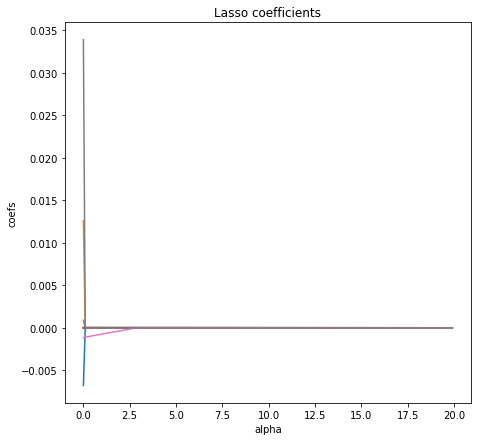

In [52]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

## **ELASTIC NET REGRESSION**

In [53]:
# importing libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [54]:
# Creating our linear regression model for the purpose of comparison
print(first_model) 

# This mean standard error score of 1.05 is our benchmark for determining 
# if the elastic net model will be better or worst. 

0.008865361104590503


In [55]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [56]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

0.00896757315787515

In [57]:
from sklearn.linear_model import ElasticNet
X = df2.iloc[:,1:-1].values
y = df2.iloc[:,-1] .values
regr = ElasticNet(random_state=0)
regr.fit(X, y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
print(regr.coef_)

[-0.00000000e+00  0.00000000e+00 -1.84386564e-05  3.43011305e-06
  0.00000000e+00  7.47493065e-05 -9.10672254e-04  0.00000000e+00]


In [59]:
print(regr.intercept_)

-33.020659806424376


In [61]:
df2.shape

(14935, 10)

In [64]:
print(regr.predict([[0,1,2,3,4,5,6,7]]))

[-33.02577668]
